# Modelo de Regresión Lineal

## Modelos con datos simulados

+ y = a + b * x
+ X : 100 valores distribuidos según una N(1.5, 2.5)
+ Ye = 5 + 1.9 * x
+ e estará distbuído según una N(0, 0.8)

In [79]:
import pandas as pd
import numpy as np

In [45]:
x = 1.5 + 2.5 * np.random.randn(100)

In [46]:
res = 0 + 0.8 + np.random.randn(100)

In [48]:
y_pred = 5 + 0.3 * x

In [49]:
y_act = 5 + 0.3 * x + res

In [50]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [51]:
data = pd.DataFrame(
{
    "x" : x_list,
    "y_act" : y_act_list,
    "y_predicción" : y_pred_list
}
)

In [52]:
data.head()

,x,y_act,y_predicción
0,0.247160,8.081371,5.074148
1,4.016011,7.669879,6.204803
2,4.572143,7.128585,6.371643
3,0.616927,5.997838,5.185078
4,-0.418292,5.730985,4.874512


In [53]:
import matplotlib.pyplot as plt
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor actual vs Predicción')

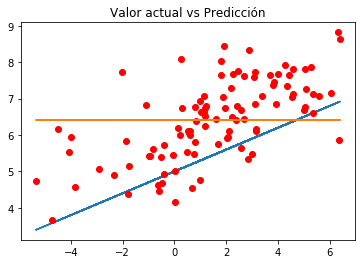

In [54]:
plt.plot(x, y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x, y_mean)
plt.title("Valor actual vs Predicción")

In [55]:
data["SSR"] =(data["y_predicción"]-np.mean(y_act))**2
data["SSD"]=(data["y_predicción"]-data["y_act"])**2
data["SST"]=(data["y_act"]-np.mean(y_act))**2

In [56]:
data.head()

,x,y_act,y_predicción,SSR,SSD,SST
0,0.247160,8.081371,5.074148,1.828949,9.043388,2.738484
1,4.016011,7.669879,6.204803,0.049165,2.146448,1.545907
2,4.572143,7.128585,6.371643,0.003013,0.572961,0.492875
3,0.616927,5.997838,5.185078,1.541213,0.660579,0.183780
4,-0.418292,5.730985,4.874512,2.408772,0.733545,0.483789


In [57]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [58]:
SSR

153.08503324468376

In [59]:
SSD

161.9404643500392

In [60]:
SST

120.51109022665915

In [61]:
SSR+SSD

315.025497594723

In [62]:
R2 = SSR/SST
R2

1.2702983016480809

(array([ 2.,  4.,  3., 13., 19., 22., 16., 12.,  6.,  3.]),
 array([-3.33788945, -2.89876834, -2.45964722, -2.0205261 , -1.58140499,
        -1.14228387, -0.70316276, -0.26404164,  0.17507948,  0.61420059,
         1.05332171]),
 <a list of 10 Patch objects>)

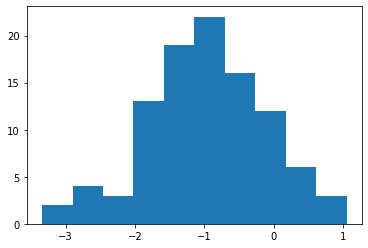

In [63]:
plt.hist(data["y_predicción"]-data["y_act"])

## Obtención de la recta de regresión
+ y = a + b * x
+ b =  sum(xi - x_m(*(y_i - y_m)/sum((xi - x_m)^2)
+ a = y_m . b * x_m

In [64]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_act"])
x_mean , y_mean

(1.556535388431365, 6.426534272014456)

In [65]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_act"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [66]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [67]:
alpha = y_mean - beta * x_mean

In [68]:
alpha, beta

(5.999215244870707, 0.2745321631102709)

+ El modelo lineal obtenido por regresión es:
y= 5.86143649163866 +  1.8885445664864748

In [69]:
data["y_model"] = alpha + beta * data["x"]

In [70]:
data.head()

,x,y_act,y_predicción,SSR,SSD,SST,beta_n,beta_d,y_model
0,0.247160,8.081371,5.074148,1.828949,9.043388,2.738484,-2.166802,1.714464,6.067069
1,4.016011,7.669879,6.204803,0.049165,2.146448,1.545907,3.057977,6.049021,7.101739
2,4.572143,7.128585,6.371643,0.003013,0.572961,0.492875,2.117110,9.093891,7.254416
3,0.616927,5.997838,5.185078,1.541213,0.660579,0.183780,0.402806,0.882863,6.168582
4,-0.418292,5.730985,4.874512,2.408772,0.733545,0.483789,1.373590,3.899943,5.884381


In [71]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum(data["y_model"]-(data["y_act"])**2)
SST = sum(data["y_act"]-y_mean)**2

In [72]:
SSR, SSD, SST

(51.088449370124124, -3607.8919379628483, 1.7046495300920844e-26)

In [73]:
R2 = SSR/SST
R2

2.997006039556081e+27

Text(0.5, 1.0, 'Valor actual vs Predicción')

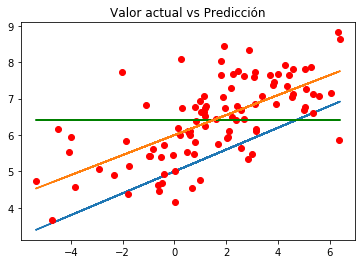

In [74]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]
plt.plot(data["x"], data["y_predicción"])
plt.plot(data["x"], data["y_act"], "ro")
plt.plot(data["x"], y_mean, "g")
plt.plot(data["x"], data ["y_model"])
plt.title("Valor actual vs Predicción")

In [80]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

C:\Users\Megaport\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


nan

In [78]:
RSE / np.mean(data["y_act"])

nan